In [26]:
import numpy as np
import requests, json
from pprint import pprint
import pandas as pd
pd.set_option('display.max_columns', None)

In [27]:
# base url for all FPL API endpoints
base_url = 'https://fantasy.premierleague.com/api/'

# get data from bootstrap-static endpoint
r = requests.get(base_url+'bootstrap-static/').json()
# show the top level fields
pprint(r, indent=2, depth=1, compact=True)

{ 'element_stats': [...],
  'element_types': [...],
  'elements': [...],
  'events': [...],
  'game_settings': {...},
  'phases': [...],
  'teams': [...],
  'total_players': 8615555}


In [28]:
pprint(self.r['elements'][390]['element_type'])
pprint(self.r['elements'][390])
pprint(self.r['elements'][334])
salah = self.r['elements'][334]
print(salah['id'])

3
{'assists': 3,
 'bonus': 4,
 'bps': 224,
 'chance_of_playing_next_round': 100,
 'chance_of_playing_this_round': 100,
 'clean_sheets': 2,
 'code': 141746,
 'corners_and_indirect_freekicks_order': 2,
 'corners_and_indirect_freekicks_text': '',
 'cost_change_event': 0,
 'cost_change_event_fall': 0,
 'cost_change_start': -3,
 'cost_change_start_fall': 3,
 'creativity': '524.3',
 'creativity_rank': 1,
 'creativity_rank_type': 1,
 'direct_freekicks_order': 1,
 'direct_freekicks_text': '',
 'dreamteam_count': 1,
 'element_type': 3,
 'ep_next': '4.5',
 'ep_this': '3.0',
 'event_points': 2,
 'first_name': 'Bruno Miguel',
 'form': '3.5',
 'goals_conceded': 17,
 'goals_scored': 4,
 'ict_index': '110.6',
 'ict_index_rank': 3,
 'ict_index_rank_type': 2,
 'id': 277,
 'in_dreamteam': False,
 'influence': '323.6',
 'influence_rank': 3,
 'influence_rank_type': 3,
 'minutes': 940,
 'news': '',
 'news_added': '2021-10-22T13:00:14.516137Z',
 'now_cost': 117,
 'own_goals': 0,
 'penalties_missed': 1,
 'pe

In [29]:
team_id = self.r['elements'][390]['team']
pprint(self.r['teams'][team_id-1]['name'])
pprint(self.r['teams'][team_id-1])

'Man Utd'
{'code': 1,
 'draw': 0,
 'form': None,
 'id': 13,
 'loss': 0,
 'name': 'Man Utd',
 'played': 0,
 'points': 0,
 'position': 0,
 'pulse_id': 12,
 'short_name': 'MUN',
 'strength': 4,
 'strength_attack_away': 1190,
 'strength_attack_home': 1160,
 'strength_defence_away': 1310,
 'strength_defence_home': 1250,
 'strength_overall_away': 1320,
 'strength_overall_home': 1280,
 'team_division': None,
 'unavailable': False,
 'win': 0}


In [30]:
pprint(self.r['element_stats'])

[{'label': 'Minutes played', 'name': 'minutes'},
 {'label': 'Goals scored', 'name': 'goals_scored'},
 {'label': 'Assists', 'name': 'assists'},
 {'label': 'Clean sheets', 'name': 'clean_sheets'},
 {'label': 'Goals conceded', 'name': 'goals_conceded'},
 {'label': 'Own goals', 'name': 'own_goals'},
 {'label': 'Penalties saved', 'name': 'penalties_saved'},
 {'label': 'Penalties missed', 'name': 'penalties_missed'},
 {'label': 'Yellow cards', 'name': 'yellow_cards'},
 {'label': 'Red cards', 'name': 'red_cards'},
 {'label': 'Saves', 'name': 'saves'},
 {'label': 'Bonus', 'name': 'bonus'},
 {'label': 'Bonus Points System', 'name': 'bps'},
 {'label': 'Influence', 'name': 'influence'},
 {'label': 'Creativity', 'name': 'creativity'},
 {'label': 'Threat', 'name': 'threat'},
 {'label': 'ICT Index', 'name': 'ict_index'}]


In [31]:
pprint(self.r['element_types'])


[{'element_count': 72,
  'id': 1,
  'plural_name': 'Goalkeepers',
  'plural_name_short': 'GKP',
  'singular_name': 'Goalkeeper',
  'singular_name_short': 'GKP',
  'squad_max_play': 1,
  'squad_min_play': 1,
  'squad_select': 2,
  'sub_positions_locked': [12],
  'ui_shirt_specific': True},
 {'element_count': 211,
  'id': 2,
  'plural_name': 'Defenders',
  'plural_name_short': 'DEF',
  'singular_name': 'Defender',
  'singular_name_short': 'DEF',
  'squad_max_play': 5,
  'squad_min_play': 3,
  'squad_select': 5,
  'sub_positions_locked': [],
  'ui_shirt_specific': False},
 {'element_count': 255,
  'id': 3,
  'plural_name': 'Midfielders',
  'plural_name_short': 'MID',
  'singular_name': 'Midfielder',
  'singular_name_short': 'MID',
  'squad_max_play': 5,
  'squad_min_play': 2,
  'squad_select': 5,
  'sub_positions_locked': [],
  'ui_shirt_specific': False},
 {'element_count': 86,
  'id': 4,
  'plural_name': 'Forwards',
  'plural_name_short': 'FWD',
  'singular_name': 'Forward',
  'singular

In [32]:
position_id = self.r['elements'][390]['element_type']
position = self.r['element_types'][position_id-1]
print(position['plural_name'])
print(position_id)

Midfielders
3


In [33]:
first_name = self.r['elements'][0]['first_name']
second_name = self.r['elements'][0]['second_name']
goals_scored = self.r['elements'][0]['goals_scored']
pprint(f"{first_name} {second_name} = {goals_scored}")


'Bernd Leno = 0'


In [34]:
df = pd.DataFrame(columns=['id', 'name', 'team', 'position', 'assist', 'chance_created', 'goals_score', 'goals_conceded', 'total_points', 'price', 'code'])
for id in range(len(self.r['elements'])):
    first_name = self.r['elements'][id]['first_name']
    second_name = self.r['elements'][id]['second_name']
    player_code = self.r['elements'][id]['code']
    team_id = self.r['elements'][id]['team']
    team = self.r['teams'][team_id-1]['name']
    goals_conceded = self.r['elements'][id]['goals_conceded']
    goals_scored = self.r['elements'][id]['goals_scored']
    creativity = round(float(self.r['elements'][id]['creativity']))
    assist = self.r['elements'][id]['assists']
    clean_sheet = self.r['elements'][id]['clean_sheets']
    price = self.r['elements'][id]['now_cost']
    total_points = self.r['elements'][id]['total_points']
    perform = self.r['elements'][id]['form']
    chance_created = self.r['elements'][id]['creativity']
    position_id = self.r['elements'][id]['element_type']
    position = self.r['element_types'][position_id-1]['plural_name']
    df.loc[id] = [id, first_name+" "+second_name, team, position, assist, creativity, goals_scored, goals_conceded, total_points, price, player_code]

df.to_csv('playersfpl.csv', index=False)

In [35]:
#UNTUK COBA RADAR
df = pd.DataFrame(columns=['id', 'assist', 'chance_created', 'goals_score', 'goals_conceded', 'total_points', 'price'])
for id in range(len(self.r['elements'])):
    first_name = self.r['elements'][id]['first_name']
    second_name = self.r['elements'][id]['second_name']
    player_code = self.r['elements'][id]['code']
    team_id = self.r['elements'][id]['team']
    team = self.r['teams'][team_id-1]['name']
    goals_conceded = self.r['elements'][id]['goals_conceded']*10
    goals_scored = self.r['elements'][id]['goals_scored']*10
    creativity = round(float(self.r['elements'][id]['creativity']) / 10)
    assist = self.r['elements'][id]['assists']*10
    clean_sheet = self.r['elements'][id]['clean_sheets']

    price = self.r['elements'][id]['now_cost']
    total_points = self.r['elements'][id]['total_points']
    perform = self.r['elements'][id]['form']
    chance_created = self.r['elements'][id]['creativity']

    position_id = self.r['elements'][id]['element_type']
    position = self.r['element_types'][position_id-1]['plural_name']

    df.loc[id] = [id, assist, creativity, goals_scored, goals_conceded, total_points, price]

df.to_csv('playersfpl_integer.csv', index=False)

In [52]:
#DATA HIGER IS BETTER
df = pd.DataFrame(columns=['id', 'assist', 'chance_created', 'goals_score', 'total_points', 'saves', 'clean_sheet'])
for id in range(len(self.r['elements'])):
    first_name = self.r['elements'][id]['first_name']
    second_name = self.r['elements'][id]['second_name']
    player_code = self.r['elements'][id]['code']
    team_id = self.r['elements'][id]['team']
    team = self.r['teams'][team_id-1]['name']
    goals_conceded = self.r['elements'][id]['goals_conceded']*10
    goals_scored = self.r['elements'][id]['goals_scored']*10
    creativity = round(float(self.r['elements'][id]['creativity']) / 5)
    assist = self.r['elements'][id]['assists']*10
    clean_sheet = self.r['elements'][id]['clean_sheets']*10
    saves = (self.r['elements'][id]['saves']+1)*10
    price = self.r['elements'][id]['now_cost']
    total_points = self.r['elements'][id]['total_points']
    perform = self.r['elements'][id]['form']
    chance_created = self.r['elements'][id]['creativity']
    position_id = self.r['elements'][id]['element_type']
    position = self.r['element_types'][position_id-1]['plural_name']

    df.loc[id] = [id, assist, creativity, goals_scored, total_points, saves, clean_sheet]

df.to_csv('higher.csv', index=False)

In [58]:
#DATA LOWER IS BETTER
df = pd.DataFrame(columns=['id', 'price' , 'goals_conceded', 'price_fall', "yellow_card", 'min_per_goal', 'min_per_assist'])
for id in range(len(self.r['elements'])):
    first_name = self.r['elements'][id]['first_name']
    second_name = self.r['elements'][id]['second_name']
    player_code = self.r['elements'][id]['code']
    team_id = self.r['elements'][id]['team']
    team = self.r['teams'][team_id-1]['name']
    goals_conceded = self.r['elements'][id]['goals_conceded']*10
    goals_scored = self.r['elements'][id]['goals_scored']*10
    creativity = round(float(self.r['elements'][id]['creativity']) / 10)
    assist = self.r['elements'][id]['assists']*10
    clean_sheet = self.r['elements'][id]['clean_sheets']
    saves = self.r['elements'][id]['saves']
    price = self.r['elements'][id]['now_cost']
    total_points = self.r['elements'][id]['total_points']
    perform = self.r['elements'][id]['form']
    chance_created = self.r['elements'][id]['creativity']
    price_fall = (self.r['elements'][id]['cost_change_start_fall']+5)*10
    yellow_card = (self.r['elements'][id]['yellow_cards']+1)*20
    min_per_goal = self.r['elements'][id]['minutes']/(self.r['elements'][id]['goals_scored']+1)/5 #supaya tidak dibagi nol
    min_per_assist = self.r['elements'][id]['minutes']/(self.r['elements'][id]['assists']+1)/5

    position_id = self.r['elements'][id]['element_type']
    position = self.r['element_types'][position_id-1]['plural_name']

    df.loc[id] = [id, price, goals_conceded, price_fall, yellow_card, min_per_goal, min_per_assist]

df.to_csv('lower.csv', index=False)

In [38]:
df = pd.read_csv('playersfpl_integer.csv')
bruno = df.loc[df['id'].isin([390, 334])]
salah = df.loc[df['id'].isin([334])]


In [39]:
from matplotlib import pyplot as plt


In [40]:
df.iloc[334,1:]

assist             80
chance_created     35
goals_score       100
goals_conceded    110
total_points      117
price             130
Name: 334, dtype: int64

In [41]:
df.iloc[385,1:]

assist             70
chance_created     21
goals_score         0
goals_conceded    100
total_points       35
price              75
Name: 385, dtype: int64

In [42]:
df.iloc[334,1:].index.tolist()

['assist',
 'chance_created',
 'goals_score',
 'goals_conceded',
 'total_points',
 'price']

In [43]:
df.iloc[334,1:].values.tolist()


[80, 35, 100, 110, 117, 130]

In [44]:
df.iloc[385,1:].values.tolist()

[70, 21, 0, 100, 35, 75]

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


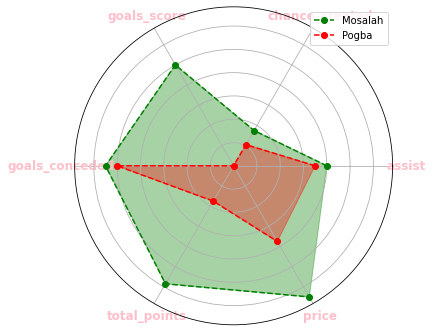

In [45]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

categories = df.iloc[334,1:].index.tolist()

values = df.iloc[334,1:].values.tolist()
values2 = df.iloc[385,1:].values.tolist()
angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(polar=True)

#values == mosalah
ax.plot(angles, values, 'o--', color='g', label='Mosalah')
ax.fill(angles, values, alpha=0.35, color='g')

#values2 == bruno/pogba/etc
ax.plot(angles, values2, 'o--', color='red', label='Pogba')
ax.fill(angles, values2, alpha=0.35, color='red')

#hidding y label
ax.set_yticklabels([])
ax.set_thetagrids(angles * 180/np.pi, labels=categories, color = 'pink', **font)

plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

In [46]:
players = self.r['elements']
teams = self.r['teams']
events = self.r['events']
players_df = pd.DataFrame(players)
teams_df = pd.DataFrame(teams)
events_df = pd.DataFrame(events)
teams_df.head()


,code,draw,form,id,loss,name,played,points,position,short_name,strength,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,None,1,0,Arsenal,0,0,0,ARS,4,None,False,0,1190,1220,1110,1140,1100,1170,1
1,7,0,None,2,0,Aston Villa,0,0,0,AVL,3,None,False,0,1130,1180,1110,1120,1130,1160,2
2,94,0,None,3,0,Brentford,0,0,0,BRE,3,None,False,0,1080,1100,1130,1160,1100,1150,130
3,36,0,None,4,0,Brighton,0,0,0,BHA,3,None,False,0,1140,1180,1160,1190,1090,1130,131
4,90,0,None,5,0,Burnley,0,0,0,BUR,2,None,False,0,1050,1060,1040,1070,1060,1100,43


In [47]:
a = requests.get('https://fantasy.premierleague.com/api/fixtures/').json()
pprint(a)

[{'code': 2210271,
  'event': 1,
  'finished': True,
  'finished_provisional': True,
  'id': 1,
  'kickoff_time': '2021-08-13T19:00:00Z',
  'minutes': 90,
  'provisional_start_time': False,
  'pulse_id': 66342,
  'started': True,
  'stats': [{'a': [],
             'h': [{'element': 77, 'value': 1}, {'element': 81, 'value': 1}],
             'identifier': 'goals_scored'},
            {'a': [],
             'h': [{'element': 91, 'value': 1}],
             'identifier': 'assists'},
            {'a': [], 'h': [], 'identifier': 'own_goals'},
            {'a': [], 'h': [], 'identifier': 'penalties_saved'},
            {'a': [], 'h': [], 'identifier': 'penalties_missed'},
            {'a': [], 'h': [], 'identifier': 'yellow_cards'},
            {'a': [], 'h': [], 'identifier': 'red_cards'},
            {'a': [{'element': 1, 'value': 1}],
             'h': [{'element': 80, 'value': 4}],
             'identifier': 'saves'},
            {'a': [],
             'h': [{'element': 81, 'value': 3},
 

In [48]:
#yourfplsquad
urlsquad = 'https://fantasy.premierleague.com/api/my-team/3680261/'

In [49]:
#fpl fixtures
urlfixtures = 'https://fantasy.premierleague.com/api/fixtures/'

In [1]:
##CSV INTO TABLESQL (( PALING BAWAH SENDIRI!! ))
##make new table in postgre from call api, comment if dont needed

# import pandas as pd
# import numpy as np
# import psycopg2
# from sqlalchemy import create_engine
# from sqlalchemy.types import String, Integer
#
# engine = create_engine('postgresql+psycopg2://postgres@localhost:5432/fpldb')
#
# df = pd.read_csv('playersfpl.csv')
# df.to_sql('tesfromjupyter', engine, if_exists='append', index=False, dtype={"name": String(), "team": String(), "position": String(), "goals_score": Integer(), "goals_conceded": Integer(), "total_points": Integer(), "price": Integer(), "code": String()})

